In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Real_Estate.csv') 

In [3]:
data.head(5) 

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
data['Transaction date'] = pd.to_datetime(data['Transaction date'])

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Transaction date                     414 non-null    datetime64[ns]
 1   House age                            414 non-null    float64       
 2   Distance to the nearest MRT station  414 non-null    float64       
 3   Number of convenience stores         414 non-null    int64         
 4   Latitude                             414 non-null    float64       
 5   Longitude                            414 non-null    float64       
 6   House price of unit area             414 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.8 KB


In [7]:
data.shape

(414, 7)

In [8]:
data.describe() 

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013-02-13 03:16:11.247379200,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
min,2012-09-02 16:42:30.519336,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,2012-11-21 03:54:22.174344448,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,2013-02-12 00:48:02.949638400,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,2013-05-02 09:55:51.372080640,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,2013-08-01 09:49:41.506402,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716
std,NaN,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935


In [9]:
data.isnull().sum() 

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

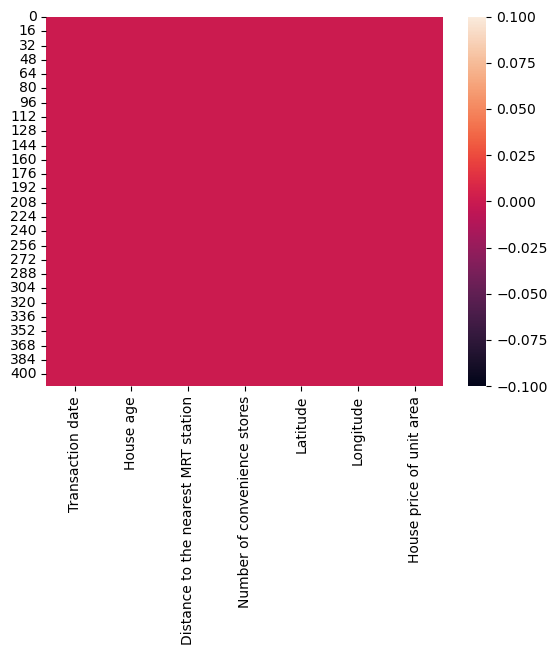

In [10]:
sns.heatmap(data.isnull())
plt.show() 

### Univariate Analysis

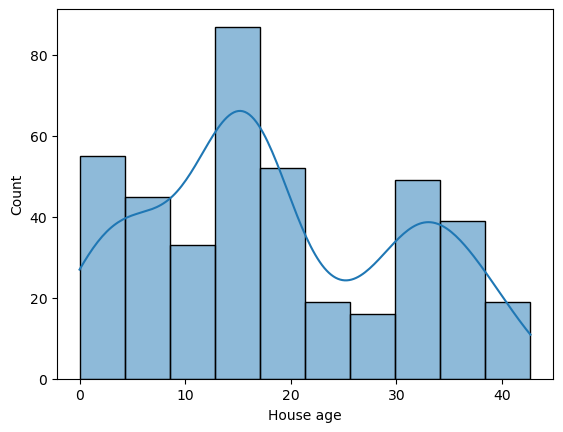

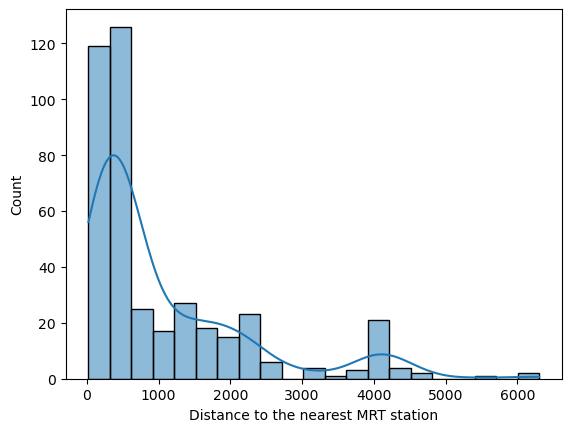

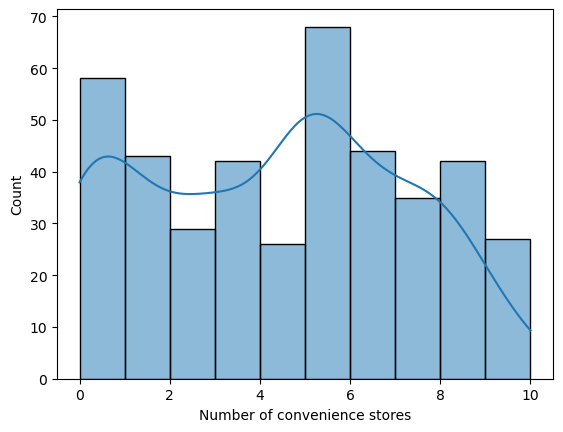

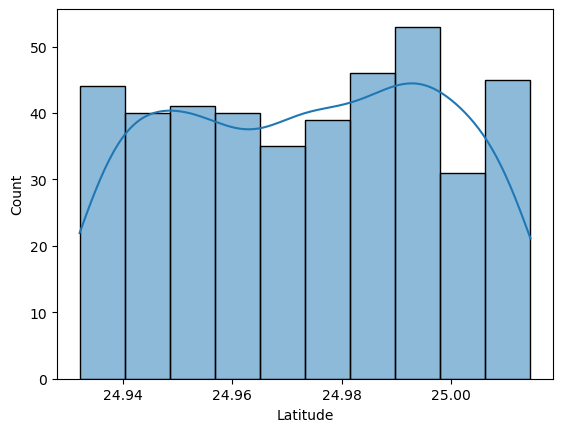

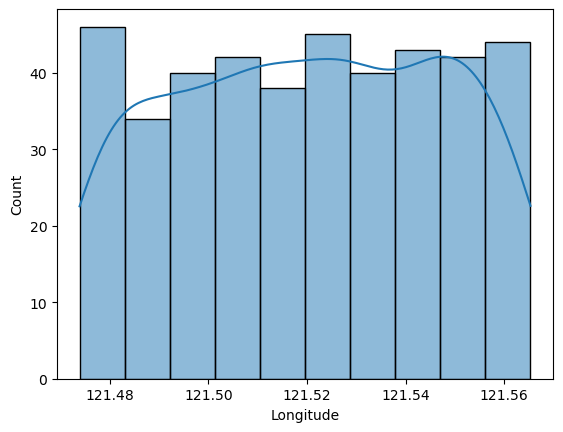

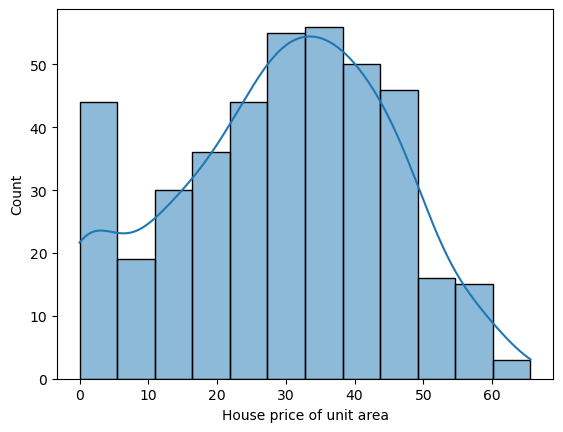

In [11]:
column = ['House age' , 'Distance to the nearest MRT station' , 'Number of convenience stores','Latitude', 'Longitude', 'House price of unit area']
for i in column:
    sns.histplot(data[i], kde = True)
    plt.show() 

### Bivariate Analysis

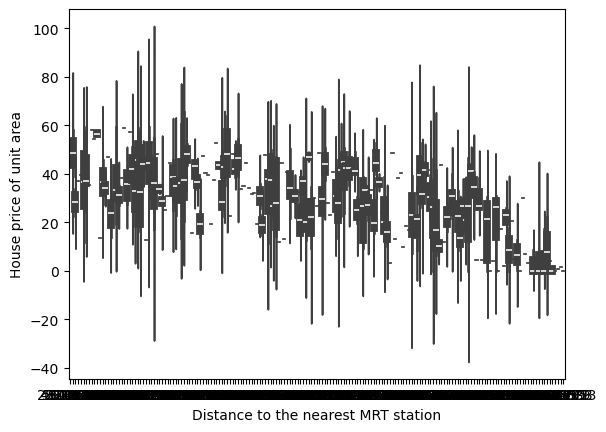

In [12]:
sns.violinplot(x=data['Distance to the nearest MRT station'], y = data['House price of unit area'], data=data)
plt.show() 

### Observation:-
1. As the distance increases from the MRT station the price of the house decreases.
2. It shows negative relation between Distance to the nearest MRT station and House price.

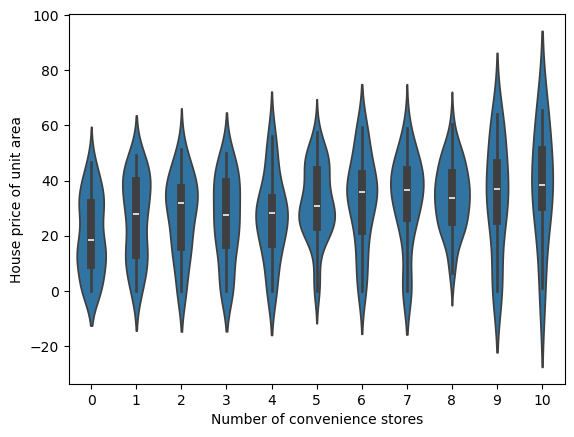

In [13]:
sns.violinplot(x=data['Number of convenience stores'], y=data['House price of unit area'], data=data)
plt.show() 

### Obseration 
 1. As the number of convienience store increases the price per unit area of house is increases.

2. It shows positive relation between convinience store and House price

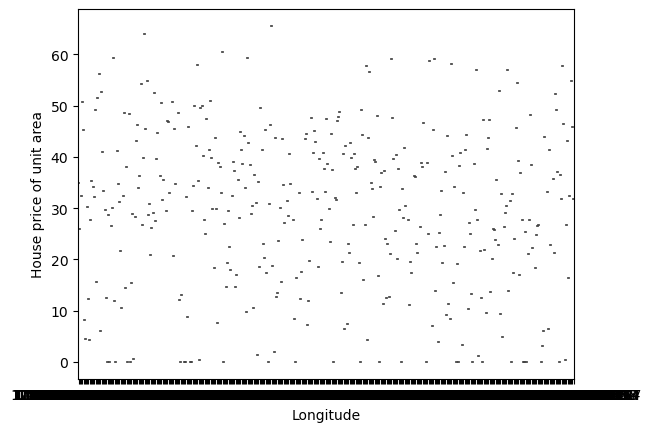

In [14]:
sns.violinplot(x=data['Longitude'], y=data['House price of unit area'], data=data)
plt.show() 

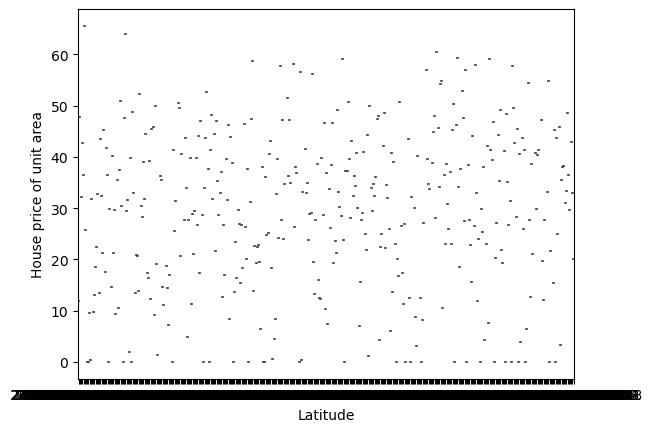

In [15]:
sns.violinplot(x=data['Latitude'], y=data['House price of unit area'], data=data)
plt.show() 

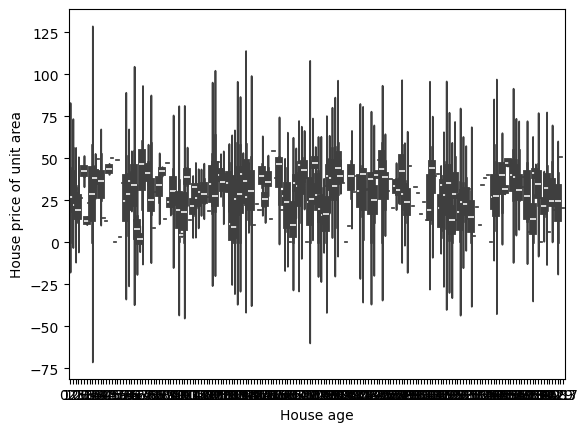

In [16]:
sns.violinplot(x=data['House age'], y=data['House price of unit area'], data=data)
plt.show() 

### Correlation Matrix

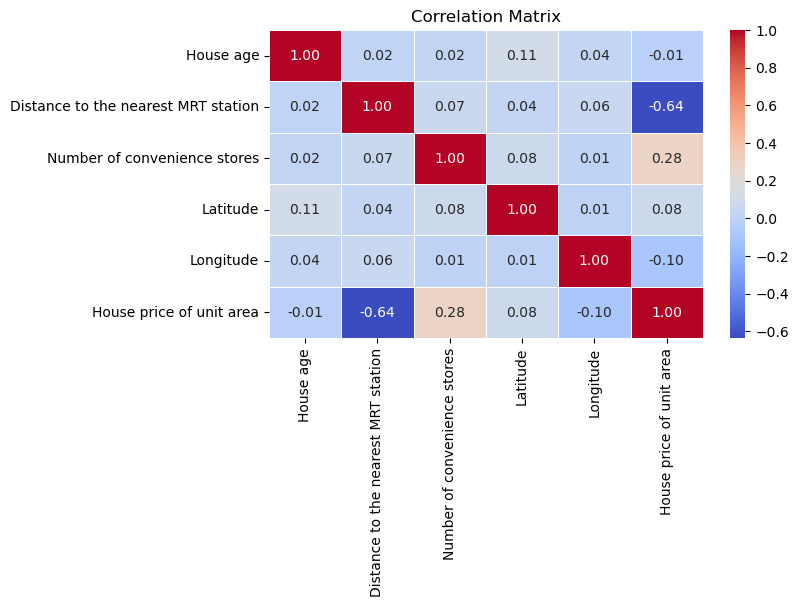

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [17]:
correlation_matrix = data.corr(numeric_only = True)

plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

In [18]:
x = data[['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']]
y = data['House price of unit area'] 

### Test the Model

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

### Model Initialize

In [20]:
model = LinearRegression() 

### Training the Model

In [21]:
model.fit(x_train, y_train) 

LinearRegression()

### Visual Representation of Actual and Predicted Values

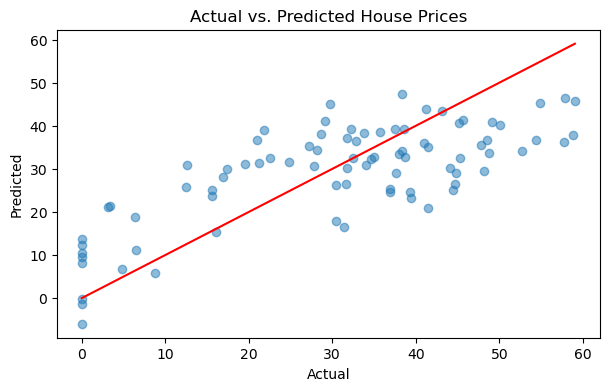

In [22]:
y_predict = model.predict(x_test)

plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c = 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()